This is a guide I created to connect to BigQuery and pull STANDARD SQL queries. 

1. Import all the necessary libraries by running the first cell. 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pandas.io import gbq

2. Enter your Google Cloud Project's ID, and run the cell. 

In [2]:
project_id='......'

3. Run a query to find the 50th, 75th and 90th quantiles against the nyc-tlc:yellow dataset to determine spread in the dataset (or to showcase amount of pickups variance against the hour-index). The result set will be saved into a pandas dataframe, which you can analyze further. Before the script can run, you will have to authenticate Google Cloud SDK, by meanse of URL. Be patient, this step will take a couple of seconds. 

In [ ]:
quantiles = """SELECT
  pickup_hour,
  quantiles[SAFE_ORDINAL(50)] fiftieth,
  quantiles[SAFE_ORDINAL(75)] seventy_fifth,
  quantiles[SAFE_ORDINAL(90)] ninetieth
FROM (
  SELECT
    pickup_hour,
    APPROX_QUANTILES(passenger_count, 101) AS quantiles
  FROM (
    SELECT
      EXTRACT (hour
      FROM
        pickup_datetime) AS pickup_hour,
      passenger_count
    FROM
      `nyc-tlc.yellow.trips`)
  GROUP BY
    pickup_hour )
    ORDER BY 1"""
trips = gbq.read_gbq(query=quantiles, dialect ='standard', project_id=project_id)

4. You can print the top results in a small table or the larger table. Thereafter you can also access matplotlib to visualise the data in graph-format.

In [8]:
trips.head()

,pickup_hour,fiftieth,seventy_fifth,ninetieth
0,0,1,2,4
1,1,1,2,4
2,2,1,2,3
3,3,1,2,4
4,4,1,2,3


In [13]:
with pd.option_context("display.max_rows", 24):
    display(trips)

,pickup_hour,fiftieth,seventy_fifth,ninetieth
0,0,1,2,4
1,1,1,2,4
2,2,1,2,3
3,3,1,2,4
4,4,1,2,3
5,5,1,1,3
6,6,1,1,3
7,7,1,1,3
8,8,1,1,3
9,9,1,1,3


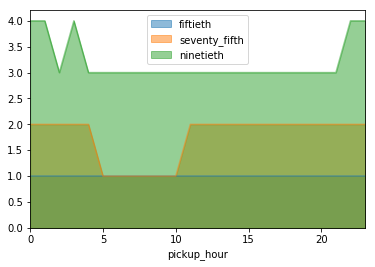

In [4]:
%matplotlib inline
plt.figure();

data = trips.set_index ('pickup_hour')
data.plot(kind='area',stacked=False)

5. To determine the average speed of Yellow taxi trips in 2015, the following query looks at the average speed during each hour of the day (as per Hour-Index).

In [ ]:
#standardSQL
d_metrics = """SELECT 
    EXTRACT(HOUR FROM pickup_datetime) hour,
    ROUND(AVG(trip_distance / TIMESTAMP_DIFF(dropoff_datetime, pickup_datetime,
    SECOND))*3600, 1) speed
FROM
  `bigquery-public-data.new_york.tlc_yellow_trips_2015`
WHERE
  trip_distance > 0
  AND fare_amount/trip_distance BETWEEN 2
  AND 10
  AND dropoff_datetime > pickup_datetime
GROUP BY
  1
ORDER BY
  1"""
trips_2 = gbq.read_gbq(query=d_metrics, dialect ='standard', project_id=project_id)

In [9]:
trips_2.head()

,hour,speed
0,0,15.8
1,1,16.3
2,2,16.8
3,3,17.5
4,4,20.0


In [6]:
with pd.option_context("display.max_rows", 24):
    display(trips_2)

,hour,speed
0,0,15.8
1,1,16.3
2,2,16.8
3,3,17.5
4,4,20.0
5,5,21.6
6,6,17.6
7,7,13.7
8,8,11.6
9,9,11.4


6. During the day the average speed is around 11-12 MPH, but at 5 AM the average speed almost doubles to 21 MPH. The table results can be plotted like below. 

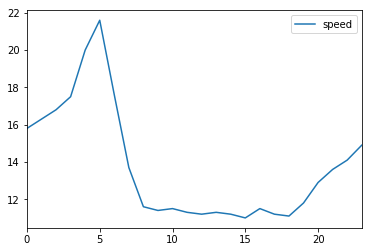

In [7]:
%matplotlib inline
trips_2[['speed']].plot()

8. Finally, save your notebook before shutting down your Jupyter-server. Shut down the server by hitting CNTRL + C. 

9. Appendix: 
* https://cloud.google.com/blog/big-data/2017/02/google-cloud-platform-for-data-scientists-using-jupyter-notebooks-with-apache-spark-on-google-cloud
* https://cloud.google.com/bigquery/public-data/nyc-tlc-trips